# ANEMIA PREDICTION 

**IMPORT LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('anemia_dataset.csv')
df.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**EXPLORATORY DATA ANALYSIS**

In [3]:
df.shape

(104, 14)

In [4]:
df.isnull().sum()

Number            0
Name              0
%Red Pixel        0
%Green pixel      0
%Blue pixel       0
Hb                0
Anaemic           0
Unnamed: 7      104
Unnamed: 8      104
Unnamed: 9      104
Unnamed: 10     104
Unnamed: 11     104
Unnamed: 12     104
Unnamed: 13     103
dtype: int64

In [5]:
df = df.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'],axis=1)

In [6]:
df.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No
4,5,monoara,43.2870,30.6972,26.0158,12.4,No


In [7]:
df.dtypes

Number            int64
Name             object
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic          object
dtype: object

In [8]:
df = df.drop('Name',axis=1)

In [9]:
df.dtypes

Number            int64
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic          object
dtype: object

In [10]:
x = df.drop('Anaemic',axis=1)

In [11]:
x.head()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,1,43.2555,30.8421,25.9025,6.3
1,2,45.6033,28.1900,26.2067,13.5
2,3,45.0107,28.9677,26.0215,11.7
3,4,44.5398,28.9899,26.4703,13.5
4,5,43.2870,30.6972,26.0158,12.4


In [12]:
x.shape

(104, 5)

In [13]:
y = df['Anaemic']

In [14]:
y

0      Yes
1       No
2       No
3       No
4       No
      ... 
99     Yes
100    Yes
101     No
102     No
103     No
Name: Anaemic, Length: 104, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)
y

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [16]:
y.shape

(104,)

**MODEL BUILDING**

In [17]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 2)

In [18]:
x_train.shape

(72, 5)

In [19]:
import tensorflow as tf 
from tensorflow import keras

In [20]:
x_test.shape

(32, 5)

In [21]:
y_train.shape

(72,)

In [22]:
y_test.shape

(32,)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(80,input_dim=5,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')])

In [24]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
H = model.fit(x_train,y_train,epochs =100,batch_size = 8 , validation_split=0.3)

Epoch 1/100
7/7 [==============================] - 1s 36ms/step - loss: 0.8084 - accuracy: 0.7400 - val_loss: 1.0566 - val_accuracy: 0.1364
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6208 - accuracy: 0.5800 - val_loss: 0.3404 - val_accuracy: 0.9091
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5616 - accuracy: 0.6800 - val_loss: 0.5639 - val_accuracy: 0.7273
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.4760 - accuracy: 0.8200 - val_loss: 0.4333 - val_accuracy: 0.8182
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.4277 - accuracy: 0.7200 - val_loss: 0.2567 - val_accuracy: 0.9091
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.4390 - accuracy: 0.8400 - val_loss: 0.3436 - val_accuracy: 1.0000
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.4397 - accuracy: 0.8400 - val_loss: 0.4428 - val_accuracy: 0.8182
Epoch 8/100
7/7 [=========

In [26]:
loss , acc  = model.evaluate( x_test,y_test)
print('Test Accuracy : ',acc*100)

1/1 [==============================] - 0s 8ms/step - loss: 0.2183 - accuracy: 0.9062
Test Accuracy :  90.625


In [27]:
loss , acc  = model.evaluate( x_train,y_train)
print('Test Accuracy : ',acc*100)

3/3 [==============================] - 0s 5ms/step - loss: 0.1854 - accuracy: 0.9583
Test Accuracy :  95.83333134651184


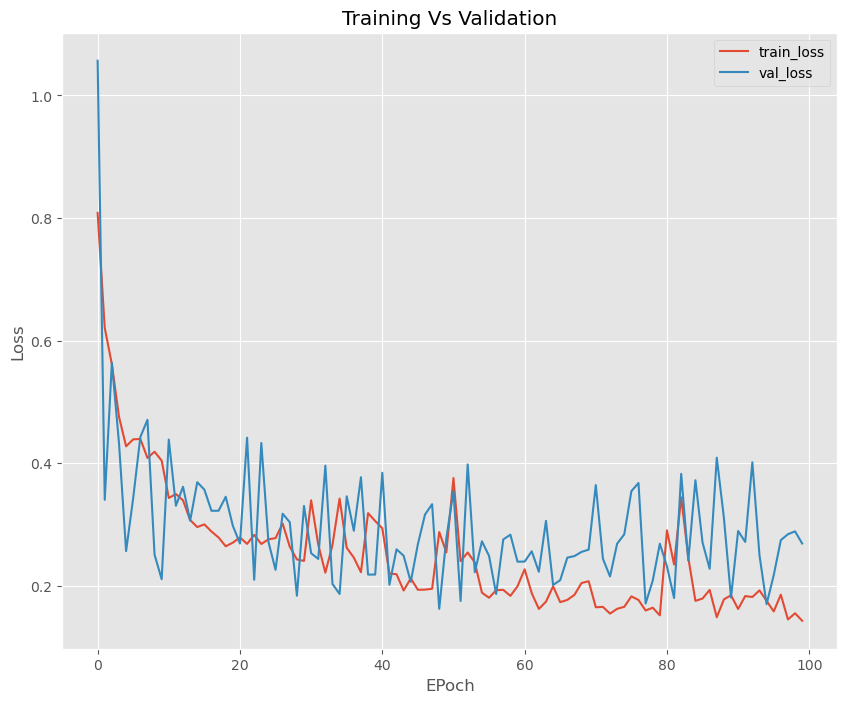

In [28]:
import matplotlib.pyplot as plt 

epochs = np.arange(0,len(H.history['loss']))
plt.figure(figsize = (10,8))
plt.style.use('ggplot')

plt.style.use('ggplot')
plt.plot(epochs,H.history['loss'],label='train_loss')
plt.plot(epochs,H.history['val_loss'],label='val_loss')
plt.title("Training Vs Validation")
plt.xlabel('EPoch')
plt.ylabel("Loss")
plt.legend()